# sample-superstore

Use the "Run" button to execute the code.

In [12]:
!pip install jovian --upgrade --quiet

In [13]:
import jovian

In [14]:
# Execute this to save new versions of the notebook
jovian.commit(project="sample-superstore")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhidubey001/sample-superstore" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhidubey001/sample-superstore


'https://jovian.ai/siddhidubey001/sample-superstore'

In [15]:
jovian.commit(project='sample-superstore',files=['SampleSuperstore.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhidubey001/sample-superstore" on https://jovian.ai
[jovian] Uploading additional files...


[jovian] Error: Ignoring "SampleSuperstore.csv" (not found)


[jovian] Committed successfully! https://jovian.ai/siddhidubey001/sample-superstore


'https://jovian.ai/siddhidubey001/sample-superstore'

In [16]:
import pandas as pd

In [17]:
import numpy as np

In [18]:
import seaborn as sns

In [19]:
import matplotlib.pylab as plt

In [21]:
superstore_df = pd.read_csv('SampleSuperstore.csv')

In [22]:
superstore_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [23]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [24]:
superstore_df.shape

(9994, 13)

In [25]:
# Check for null value using .isnull() function

superstore_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [26]:
superstore_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Segment wise data

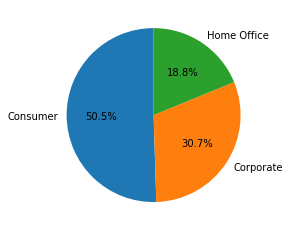

In [27]:
pie_data = (superstore_df.groupby('Segment')['Sales'].sum()).to_frame();
pie_data['Percent_Sale'] = round((pie_data.Sales/sum(pie_data.Sales))*100);
plt.pie(pie_data.Percent_Sale, labels=pie_data.index,  startangle=90, autopct='%.1f%%');
plt.show;

## Category wise data

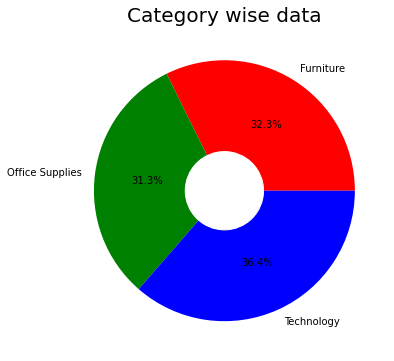

In [28]:
donut_data = (superstore_df.groupby('Category')['Sales'].sum()).to_frame()
donut_data['Percent_Sale'] = (donut_data.Sales/sum(donut_data.Sales))*100
plt.figure(figsize=(10,6))
plt.title("Category wise data", fontsize= 20)
my_circle=plt.Circle( (0,0), 0.3, color='white')
plt.pie(donut_data.Percent_Sale, labels=donut_data.index, autopct='%1.1f%%',colors=['red','green','blue'])
p=plt.gcf();p.gca().add_artist(my_circle);plt.show()

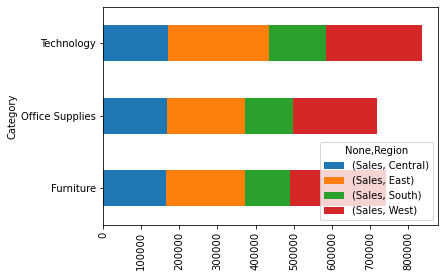

In [29]:
stacked_data = pd.pivot_table(superstore_df,index=['Category'], columns=['Region'], values=['Sales'], aggfunc='sum')
stacked_data.plot.barh(stacked=True);
plt.xticks(rotation=90);

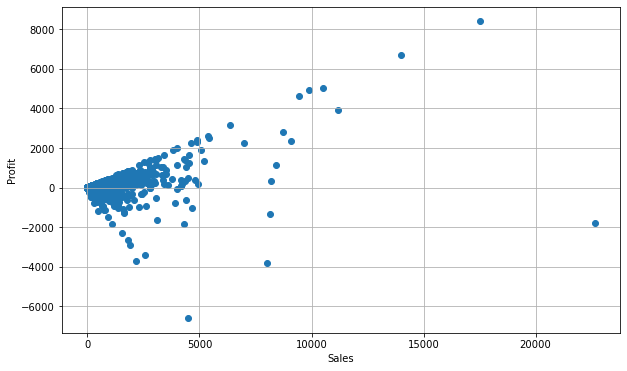

In [30]:
fig, ax = plt.subplots(figsize = (10 , 6))
plt.grid()
ax.scatter(superstore_df["Sales"] , superstore_df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

## Category wise sale using line chart

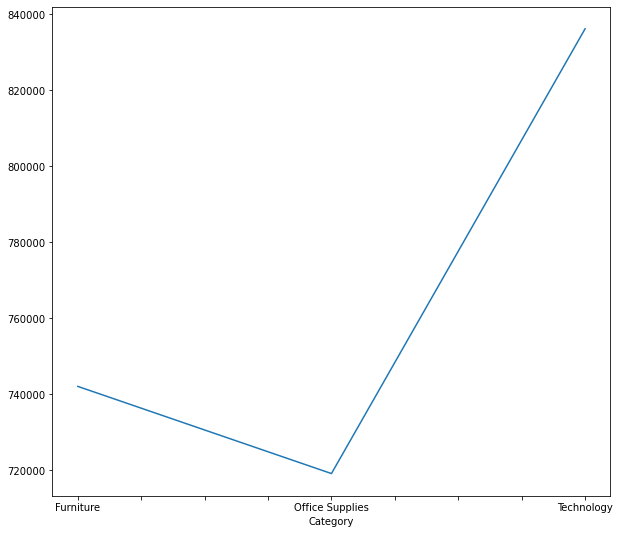

In [31]:
var=superstore_df.groupby("Category").Sales.sum()
plt.figure(figsize=(10,9));
ax1=fig.add_subplot(1,1,1)
ax1.set_xlabel("Category")
ax1.set_ylabel("sales");
ax1.set_title("Category wise sales", fontsize=16);
var.plot(kind='line');

In [32]:
superstore_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

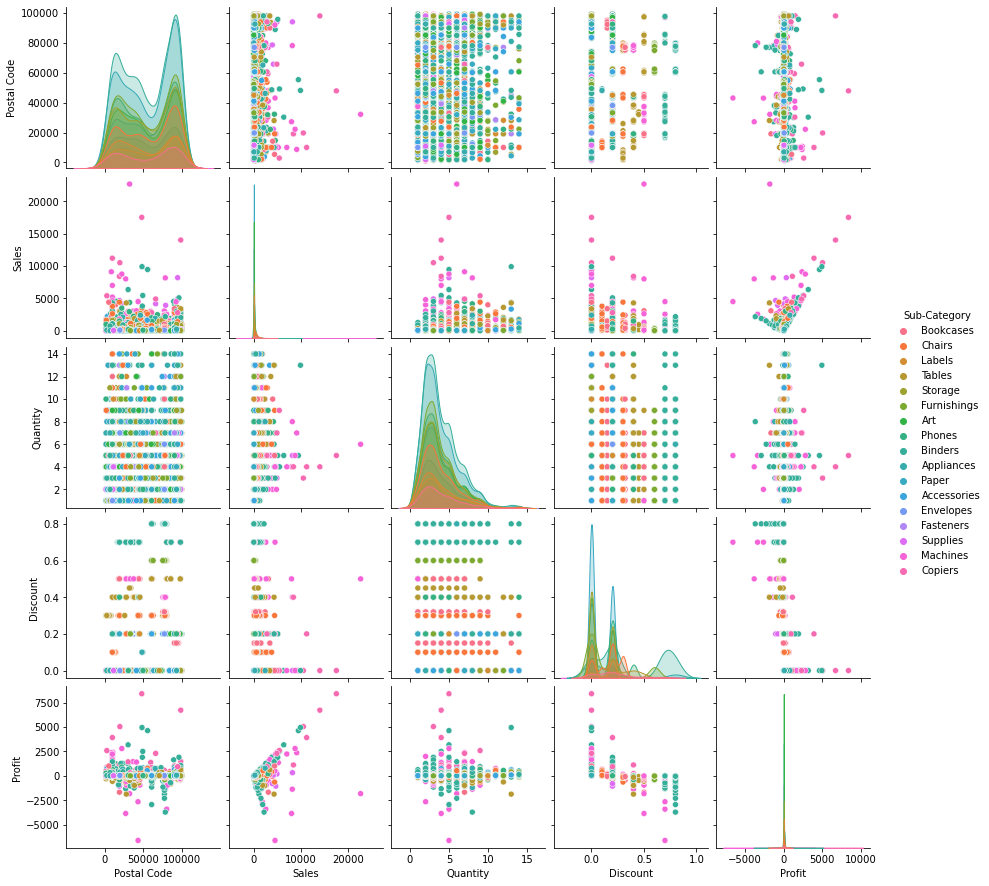

In [33]:
figsize=(15,10)
sns.pairplot(superstore_df,hue='Sub-Category');
plt.show

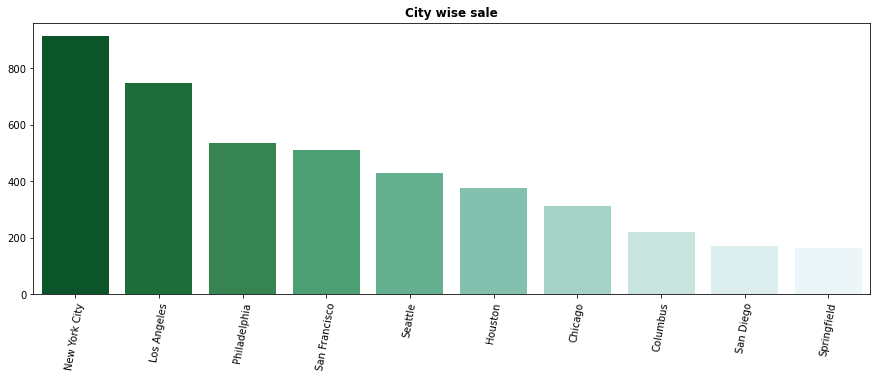

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x = superstore_df["City"].value_counts().head(10).index,
            y = superstore_df["City"].value_counts().head(10).values,palette="BuGn_r")
plt.xticks(rotation=80)
plt.title("City wise sale",fontweight="bold")
plt.show()

In [35]:
superstore_df.groupby("Category").Profit.sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


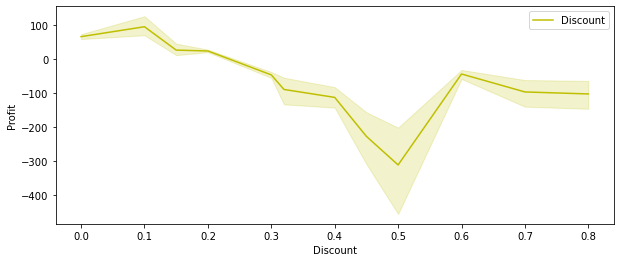

In [36]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=superstore_df , color='y',label='Discount');
plt.legend();
plt.show();

In [37]:
import jovian

In [38]:
jovian.commit(project='sample_superstore')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "siddhidubey001/sample-superstore" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/siddhidubey001/sample-superstore


'https://jovian.ai/siddhidubey001/sample-superstore'

## Here i am asking 5 question about my data set

# 1. What is the region wise sales value?

In [46]:
superstore_df.groupby("Region").Sales.sum()

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

# 2.What are the different ship mode?

In [47]:
diff_ship_mode=superstore_df['Ship Mode'].unique()
for x in diff_ship_mode:
    print(x)

Second Class
Standard Class
First Class
Same Day


# 3.What are the category wise profit?

In [49]:
superstore_df.groupby("Category").Profit.sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64